<a href="https://colab.research.google.com/github/phoebewang28/french-girls/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data Bootcamp Project: Dead or Alive -- Titanic Classification

In [ ]:
import numpy as np
from math import *
from datascience import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Part 1: Data Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#titanic_df = pd.read_csv('/content/gdrive/My Drive/titanic_dirty_info.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
titanic = Table.read_table('/content/gdrive/My Drive/titanic_dirty_info.csv')
titanic.show(5)

passenger age,Cabin,Location Embarked,FARE,Passenger Name,# of parents/children,PassengerId,Passenger Class,Sex,# of siblings/spouses,Survived,Ticket,Title,Family_Size
20,C14,nan,nan,"Pang, Mr. Joseph Guadalupe",nan,nan,nan,MALE,nan,no,nan,Mr,nan
22,nan,S,7.25,"Braund, Mr. Owen Harris",0,1,3,MALE,1,no,A/5 21171,Mr,1
38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,2,1,FEMALE,1,yes,PC 17599,Mrs,1
26,nan,S,7.925,"Heikkinen, Miss. Laina",0,3,3,FEMALE,0,yes,STON/O2. 3101282,Miss,0
35,C123,S,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,FEMALE,1,yes,113803,Mrs,1


In [ ]:
# function to make it easier to remove 'nan' entries by turning them into strings
def to_str(array):
    new_array = make_array()
    for i in array:
        if (i>0 or i<0 or i==0):
            new_array = np.append(new_array,i)
        else:
            new_array = np.append(new_array,str(i))
    return new_array

In [ ]:
#run this cell to use the to_str function on the necessary columns.
new_Fare = to_str(titanic.column('FARE'))
new_Class = to_str(titanic.column('Passenger Class'))
new_Family_Size = to_str(titanic.column('Family_Size'))

In [ ]:
#update columns
titanic = titanic.with_columns('FARE', new_Fare, 'Passenger Class', new_Class, 'Family_Size', new_Family_Size)
titanic.show(5)

passenger age,Cabin,Location Embarked,FARE,Passenger Name,# of parents/children,PassengerId,Passenger Class,Sex,# of siblings/spouses,Survived,Ticket,Title,Family_Size
20,C14,nan,nan,"Pang, Mr. Joseph Guadalupe",nan,nan,nan,MALE,nan,no,nan,Mr,nan
22,nan,S,7.25,"Braund, Mr. Owen Harris",0,1,3.0,MALE,1,no,A/5 21171,Mr,1.0
38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,2,1.0,FEMALE,1,yes,PC 17599,Mrs,1.0
26,nan,S,7.925,"Heikkinen, Miss. Laina",0,3,3.0,FEMALE,0,yes,STON/O2. 3101282,Miss,0.0
35,C123,S,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1.0,FEMALE,1,yes,113803,Mrs,1.0


In [ ]:
# remove columns, prettify labels
titanic = titanic.drop('Cabin', 'Location Embarked', 'PassengerId', 'Ticket', 'Title', '# of parents/children', '# of siblings/spouses')
titanic.relabel('passenger age', 'Age')
titanic.relabel('FARE', 'Fare')
titanic.relabel('Passenger Name', 'Name')
titanic.relabel('Passenger Class', 'Class')
titanic.relabel('Family_Size', 'Family Size')
titanic.show(5)

passenger age,FARE,Passenger Name,Passenger Class,Sex,Survived,Family_Size
20,nan,"Pang, Mr. Joseph Guadalupe",nan,MALE,no,nan
22,7.25,"Braund, Mr. Owen Harris",3.0,MALE,no,1.0
38,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1.0,FEMALE,yes,1.0
26,7.925,"Heikkinen, Miss. Laina",3.0,FEMALE,yes,0.0
35,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,FEMALE,yes,1.0


In [ ]:
titanic = titanic.where('Fare', are.not_equal_to('nan'))
titanic.show(5)

Age,Fare,Name,Class,Sex,Survived,Family Size
22,7.25,"Braund, Mr. Owen Harris",3.0,MALE,no,1.0
38,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1.0,FEMALE,yes,1.0
26,7.925,"Heikkinen, Miss. Laina",3.0,FEMALE,yes,0.0
35,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,FEMALE,yes,1.0
35,8.05,"Allen, Mr. William Henry",3.0,MALE,no,0.0


In [ ]:
# turn columns back into floats
def to_float(array):
    new_array = make_array()
    for i in array:
        new_array = np.append(new_array,float(i))
    return new_array

In [ ]:
new_Fare = to_float(titanic.column('Fare'))
new_Class = to_float(titanic.column('Class'))
new_Family_size = to_float(titanic.column('Family Size'))

In [ ]:
titanic = titanic.with_columns('Fare', new_Fare, 'Class', new_Class, 'Family Size', new_Family_size)
titanic.show(5)

Age,Fare,Name,Class,Sex,Survived,Family Size
22,7.25,"Braund, Mr. Owen Harris",3,MALE,no,1
38,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,FEMALE,yes,1
26,7.925,"Heikkinen, Miss. Laina",3,FEMALE,yes,0
35,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,FEMALE,yes,1
35,8.05,"Allen, Mr. William Henry",3,MALE,no,0


In [ ]:
sex_lower = titanic.apply(np.char.lower, 'Sex')
sex_lower

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

In [ ]:
titanic = titanic.with_columns('Sex', sex_lower)
titanic.show(5)

Age,Fare,Name,Class,Sex,Survived,Family Size
22,7.25,"Braund, Mr. Owen Harris",3,male,no,1
38,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,female,yes,1
26,7.925,"Heikkinen, Miss. Laina",3,female,yes,0
35,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,yes,1
35,8.05,"Allen, Mr. William Henry",3,male,no,0


In [ ]:
# turn survived column into numerical data
def one_zero(x):
    if x == 'yes':
        return 1
    else:
        return 0

In [ ]:
new_survived = titanic.apply(one_zero, 'Survived')
titanic = titanic.with_columns('Survived', new_survived)
titanic.show(5)

Age,Fare,Name,Class,Sex,Survived,Family Size
22,7.25,"Braund, Mr. Owen Harris",3,male,0,1
38,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,female,1,1
26,7.925,"Heikkinen, Miss. Laina",3,female,1,0
35,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,1,1
35,8.05,"Allen, Mr. William Henry",3,male,0,0


## Part 2: Exploratory Data Analysis

### General exploration

In [ ]:
total_passengers = titanic.num_rows
num_survived = sum(titanic.column('Survived'))
print('There were ' + str(total_passengers) + ' passengers on the Titanic, but only ' + str(num_survived) + ' survived.')

There were 891 passengers on the Titanic, but only 342 survived.


In [ ]:
# Number of males onboard
num_male = titanic.where('Sex', are.equal_to('male')).num_rows

# Number of females onboard
num_female = titanic.where('Sex', are.equal_to('female')).num_rows

print('There were ' + str(num_male) + ' male passengers, but only ' + str(num_female) + ' female passengers.')

There were 577 male passengers, but only 314 female passengers.


### Descriptive statistics (mean, median, etc.)

In [ ]:
mean_fare = np.mean(titanic.column('Fare'))
mean_age = np.mean(titanic.column('Age'))
print('The mean fare on the Titanic is ' + str(mean_fare))
print('The mean age on the Titanic is ' + str(mean_age))

The mean fare on the Titanic is 32.2042079686
The mean age on the Titanic is 29.4451964085


In [ ]:
rounded_mean_fare = round(mean_fare)
rounded_mean_age = round(mean_age)
print('The mean fare on the Titanic is ' + str(rounded_mean_fare))
print('The mean age on the Titanic is ' + str(rounded_mean_age))

The mean fare on the Titanic is 32
The mean age on the Titanic is 29


In [ ]:
median_fare = round(np.median(titanic.column('Fare')))
median_age = round(np.median(titanic.column('Age')))
print('The median fare on the Titanic is ' + str(median_fare))
print('The median age on the Titanic is ' + str(median_age))

The median fare on the Titanic is 14
The median age on the Titanic is 30


### Distributions

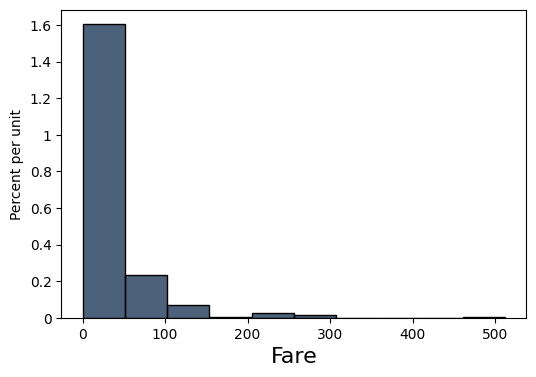

In [ ]:
titanic.hist('Fare')

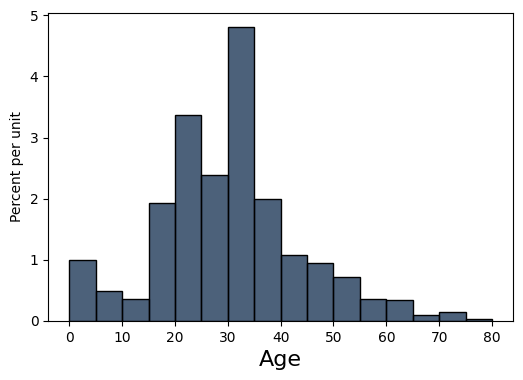

In [ ]:
titanic.hist('Age', bins = np.arange(0, 81, 5))

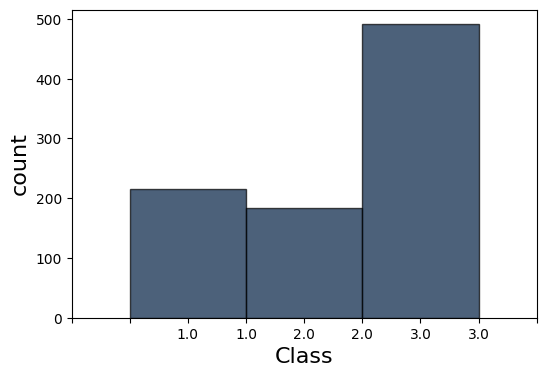

In [ ]:
class_count = titanic.group('Class')
class_count.bar('Class')

In [ ]:
fare_class = titanic.drop('Name', 'Age', 'Sex', 'Survived', 'Family Size')
fare_class.show(5)

Fare,Class
7.25,3
71.2833,1
7.925,3
53.1,1
8.05,3


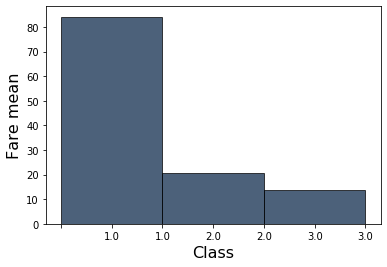

In [ ]:
class_grouped = fare_class.group('Class', np.mean)
class_grouped.bar('Class')

In [ ]:
age_fare = titanic.drop('Name', 'Class', 'Survived', 'Family Size')
age_fare.show(5)

Age,Fare,Sex
22,7.25,male
38,71.2833,female
26,7.925,female
35,53.1,female
35,8.05,male


In [ ]:
gender_grouped = age_fare.group('Sex', np.mean)
gender_grouped

Sex,Age mean,Fare mean
female,27.6481,44.4798
male,30.4232,25.5239


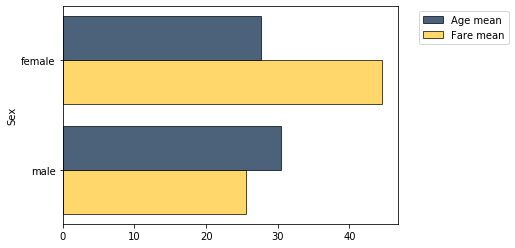

In [ ]:
gender_grouped.barh('Sex')

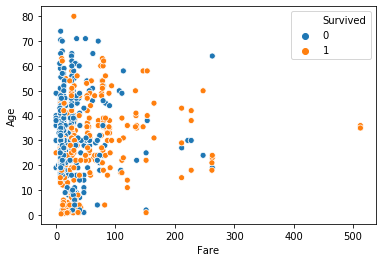

In [ ]:
df = pd.read_csv('titanic_cleaned.csv')
sns.scatterplot('Fare', 'Age', data=df, hue='Survived');